# Chapter2 _Multi-armed Bandit_
- The RL method uses training information that **evaluates** the actions taken rather than **instructs** by giving correct actions.
- Need for **active exploration**
- Purely evaluative feedback vs. purely instructive feedback: _evaluative feedback depends entirely on the action taken, whereas instructive feedback is independent of the action taken_
- The instructive feedback is the basis of **supervised learning** including _pattern classification, artificial neural networks, and system identification_

## K-armed Bandit Problem
- An agent + repeatedly a choice among k different options (actions) --> a numerical reward chosen from a stationary probability distribution that depends on the selected action
- **The objective**: maximize the expected total reward over some time period (time steps)
- **The value of the action**: an expected or mean reward given that that action is selected
- The expected reward is: $q_*(a) \doteq \mathbb{E}[R_t \mid A_t = a]$
- The estimated value of action: $Q_t(a)$
- We would like the estimation to be close to the real value
- **The greedy action** is the action with the highest estimated value
- Selecting the greedy action according to current knowledge means _exploiting_ resulting to maximize the expected reward on the _one step_
- selecting nongreedy action means _exploring_ may produce the greater total reward in the _long run_

## Action-value Methods
- The true value of an action is the _mean reward_:
$Q_t(a) \doteq \frac{\text{sum of rewards when (a) taken prior to (t)}}{\text{number of times (a) taken prior to (t)}} = \frac{\sum_{i=1}^{t-1}R_i\cdot\mathbb{1}_{A_i = a}}{\sum\_{i=1}^{t-1}\mathbb{1}\_{A_i = a}}$
- 1 denotes the random variable that is 1 if _predicate_ is true and 0 if it is not
- If the denominator is zero --> define $Q_t(a)$ as some default value
- If the time goes to infinity --> $Q_t(a)$ converge to $q_*(a)$
- _sample-average method_ is not necessarily the best way
- If the is more than one greedy action: $A_t \doteq \arg\max_a Q_t(a)$
- $\epsilon$-greedy method
  - in the limit of as the number of steps increases, every action will be sampled an infinite number of times
  - ensuring all the $Q_t(a)$ converge to $q_*(a)$
  - the probability of selecting the optimal action converges to greater than $1-\epsilon$

## The 10-armed Testbed
- A set of 2000 randomly generated 10-armed bandits with a normal distribution with mean zero and unit variance.
![image](https://github.com/user-attachments/assets/c9edf1b7-a0b8-450c-9ad2-501ed1e631a8)
- We can measure any learning method's performance and behaviour as it improves with experience over 1000 time steps when applied to one of the bandit problems. This makes up one run. Repeating this for 2000 independent runs, each with a different bandit problem, we obtained measures of the learning algorithm’s average behaviour.
- Using sample-average technique

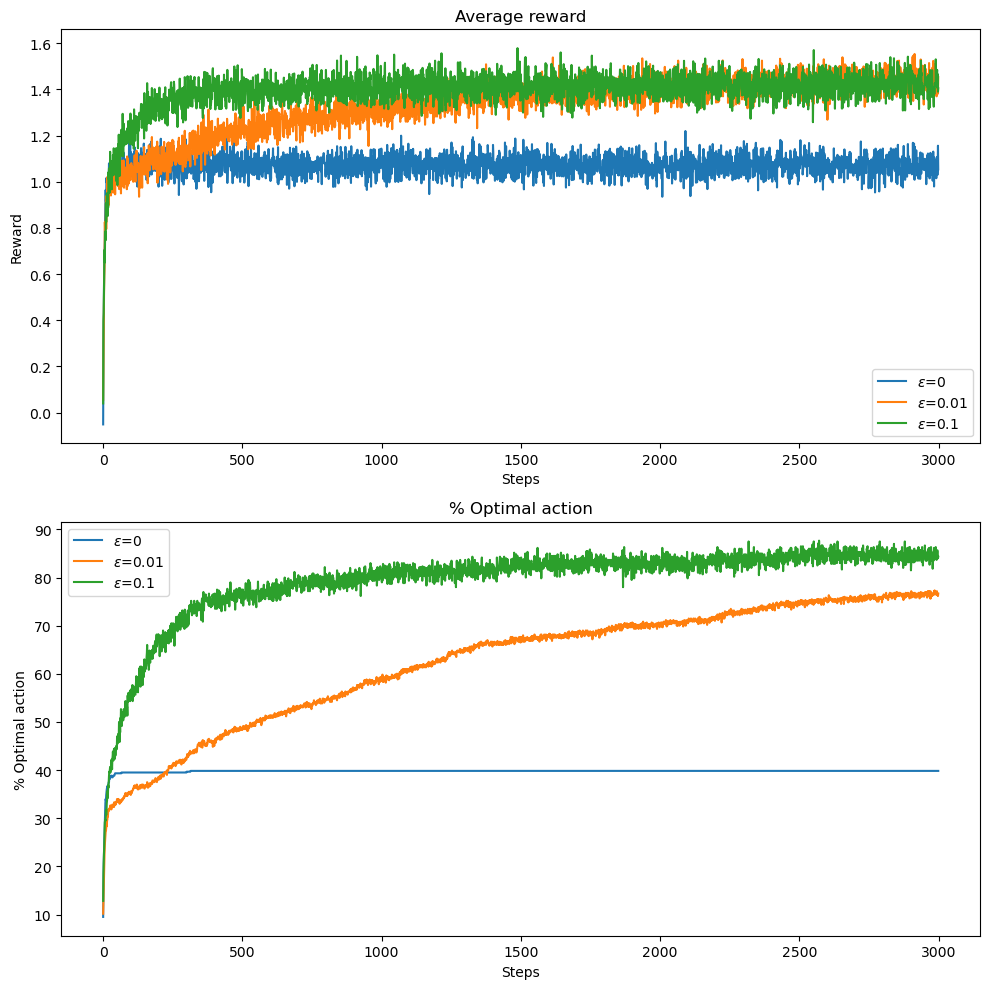

In [21]:
#Created on Thu Jan  9 18:43:53 2025
#author: Mahdi Amani

import numpy as np
import matplotlib.pyplot as plt

# Parameters
num_actions = 10  # Number of bandit arms
num_steps = 3000  # Number of steps
num_runs = 600  # Number of runs
epsilons = [0, 0.01, 0.1]  # Values of epsilon

# Function to simulate the bandit problem
def simulate_bandit(epsilon, num_steps, num_runs, num_actions):
    rewards = np.zeros((num_runs, num_steps))
    optimal_action_counts = np.zeros((num_runs, num_steps))
    
    for run in range(num_runs):
        # True action values for this run
        true_values = np.random.normal(0, 1, num_actions)
        optimal_action = np.argmax(true_values)
        
        # Estimated action values and action counts
        Q = np.zeros(num_actions)
        action_counts = np.zeros(num_actions)
        
        for step in range(num_steps):
            # Epsilon-greedy action selection
            if np.random.rand() < epsilon:
                action = np.random.randint(num_actions)  # Random action
            else:
                action = np.argmax(Q)  # Greedy action
            
            # Reward from the selected action
            reward = np.random.normal(true_values[action], 1)
            rewards[run, step] = reward
            
            # Update optimal action count
            if action == optimal_action:
                optimal_action_counts[run, step] = 1
            
            # Update action value estimate
            action_counts[action] += 1
            Q[action] += (reward - Q[action]) / action_counts[action]
    
    # Average rewards and optimal action percentages
    avg_rewards = np.mean(rewards, axis=0)
    optimal_action_percent = np.mean(optimal_action_counts, axis=0) * 100
    
    return avg_rewards, optimal_action_percent

# Simulate for each epsilon value
results = {}
for epsilon in epsilons:
    avg_rewards, optimal_action_percent = simulate_bandit(epsilon, num_steps, num_runs, num_actions)
    results[epsilon] = (avg_rewards, optimal_action_percent)

# Plotting
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Average reward plot
for epsilon in epsilons:
    axs[0].plot(results[epsilon][0], label=f"$\\epsilon$={epsilon}")
axs[0].set_title("Average reward")
axs[0].set_xlabel("Steps")
axs[0].set_ylabel("Reward")
axs[0].legend()

# % Optimal action plot
for epsilon in epsilons:
    axs[1].plot(results[epsilon][1], label=f"$\\epsilon$={epsilon}")
axs[1].set_title("% Optimal action")
axs[1].set_xlabel("Steps")
axs[1].set_ylabel("% Optimal action")
axs[1].legend()

plt.tight_layout()
plt.show()

- The above graphs illustrate:
  - a comparison between a greedy method ($\epsilon=0$) and two $\epsilon$-greedy one.
  - they formed their action-value estimation using the **sample-average technique**
  - the **greedy** method performed **worse** in the long run because of getting stuck in suboptimal actions